# Sequence to Sequence Models

Best Explanation - https://www.youtube.com/watch?v=L8HKweZIOmg&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=18

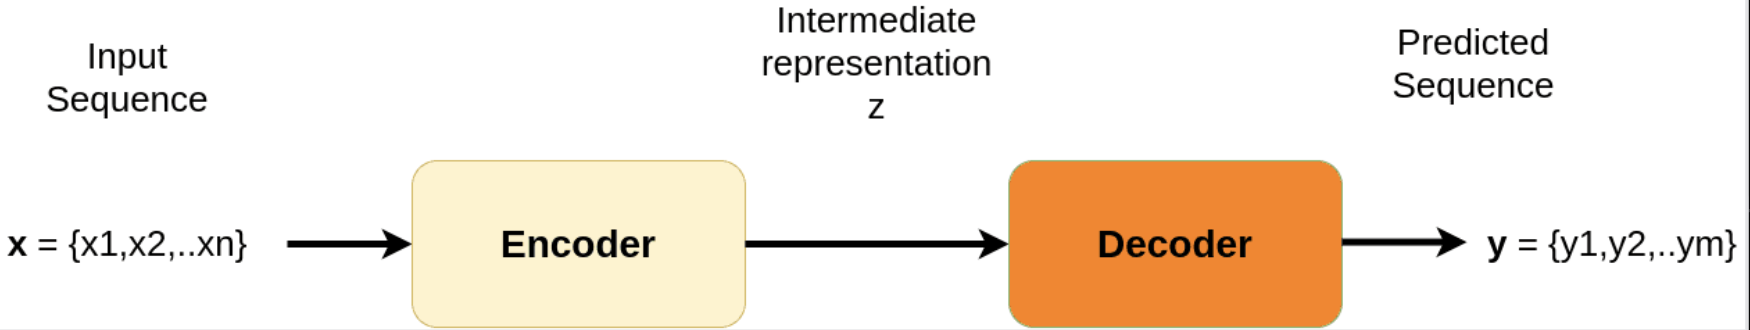

Ideally, a model has to understand the input sentence in one language. This is captured in the so-called “encoder”. It produces the intermediate representation, denoted as z, in the diagram.

We need to convert the meaning into another language, so let’s call this model decoder.

> The elements of the sequence x1, x2, etc. are usually called tokens. They can be literally anything.

The Recurrent Neural Networks (RNNs) we saw in previous lessons used to dominate Seq2Seq (Sequence to sequence) tasks.

The reason is simple: we liked to treat sequences sequentially. Sounds obvious and optimal? Attention mechanisms, and eventually transformers, proved that it was not!

In fact, RNN-based architectures used to work very well, especially with LSTM components.

The problem? Only for small sequences (<20 timesteps). 

# The limitations of RNNs
The main issue is that the intermediate representation z cannot encode information from all the input timesteps. This is commonly known as the bottleneck problem. The vector z needs to capture all the information about the source sentence.

In theory, mathematics indicates that this is possible. However, in practice, how far we can see in the past (the so-called reference window) is finite. The fact that we have limited data is an important factor. Hence, RNNs tend to forget information from timesteps that are far behind.

In most cases, the vector z will be unable to compress the information of the first few words as well as the 97th word.

Eventually, the system pays more attention to the last parts of the sequence. However, this is not usually the optimal way to approach a sequence task, and it is not compatible with the way humans translate or even understand language.

# Attention

Attention was born in order to address the limitations of Seq2Seq models.

> The core idea is that the context vector z should have access to all parts of the input sequence instead of just the last one.

## 1. What LSTMs Solved: Gradient Flow 🧠
You are right: LSTMs (and GRUs) were developed specifically to combat the traditional Recurrent Neural Network (RNN) problems of vanishing and exploding gradients.

- How They Solved It: By introducing the Cell State (c) and gates (Forget, Input, Output), LSTMs created an internal "information highway" that allows gradients to flow smoothly over many time steps. The gates regulate the flow of information, preventing the gradients from either shrinking to zero (vanishing) or growing uncontrollably (exploding).

- Result: LSTMs enabled training sequences that were much longer than traditional RNNs could handle, making deeper sequence models feasible.

## 2. What Attention Solved: The Fixed Context Bottleneck 🤯
Even with LSTMs, the Seq2Seq architecture suffered from a critical, inherent limitation:

### The Bottleneck Problem
In the classic Encoder-Decoder structure:

- The Encoder reads the entire input sequence (e.g., a sentence).

- It is forced to compress all the information from that long sequence into a single, fixed-size context vector (the final hidden state).

- This single vector must then serve as the sole source of input/memory for the Decoder to generate the entire output sequence.

### The Limitation:
For long, complex sequences (like a paragraph or a long technical sentence):

- The single context vector simply cannot hold all the necessary information.

- The model often forgets the beginning of the input sentence because the final hidden state is dominated by the most recent words.

### Attention's Solution
Attention addressed this by getting rid of the single context vector bottleneck:

- Mechanism: Attention allows the Decoder to look back at all of the Encoder's hidden states (not just the last one) at every step of generating the output.

- Dynamic Focus: Instead of relying on a single summary, the Decoder dynamically decides which parts of the input are most relevant for generating the next output token.

>In conclusion: While LSTMs fixed the mechanical problems of training deep RNNs, Attention fixed the structural problem of memory capacity in the Seq2Seq architecture. This led to a massive performance leap in tasks like Machine Translation and summarization.

In other words, we need to form a direct connection with each timestep.

This idea was originally proposed for computer vision. It was initially conceptualized like this: by looking at different parts of the image (glimpses), we can learn to accumulate information about a shape and classify the image accordingly.

The same principle was later extended to sequences. We can look at all the different words at the same time and learn to “pay attention“ to the correct ones depending on the task at hand.

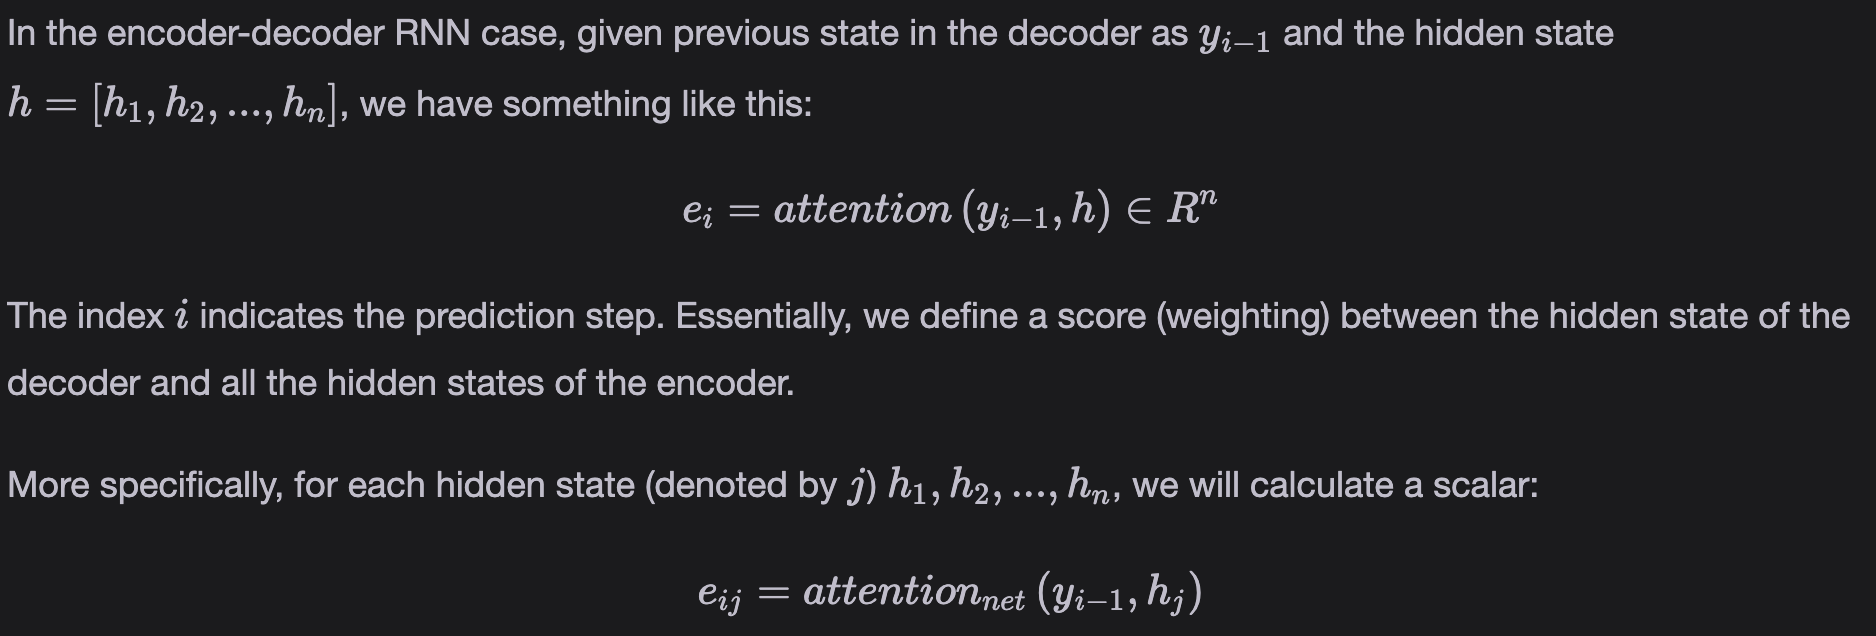

# 🧠 Understanding the Attention Mechanism in Sequence Models

This architecture, typically used in **Sequence-to-Sequence (Seq2Seq)** models, consists of two main **Recurrent Neural Networks (RNNs)** connected by the **Attention Mechanism**.

---

## 1. Explanation of the Attention Architecture

### A. The Encoder (Bottom, Yellow)
* **Function:** Reads the input sequence ($\mathbf{x}_1, \mathbf{x}_2, \ldots$) one step at a time.
* **Output:** Generates a sequence of **hidden states** ($\mathbf{h}^0, \mathbf{h}^1, \mathbf{h}^2, \mathbf{h}^3, \mathbf{h}^4, \ldots$) that summarizes the input at each time step. These hidden states hold the input information that the decoder needs to access.

### B. The Decoder (Top, Orange)
* **Function:** Generates the output sequence ($\mathbf{y}_1, \mathbf{y}_2, \ldots$) one step at a time.
* **The Problem (Solved by Attention):** Instead of relying only on a single, final context vector, the decoder uses **all** of the encoder's hidden states ($\mathbf{h}^j$) to decide the next output ($\mathbf{y}^i$).

### C. The Attention Mechanism (Center)
This mechanism connects the two RNNs:

1.  **Alignment Scores ($e_{ij}$):** The Attention neural net first compares the decoder's current state (implicitly $\mathbf{s}^{i-1}$) with **every** encoder hidden state ($\mathbf{h}^j$) to compute an **alignment score** ($e_{ij}$). This score measures how relevant $\mathbf{h}^j$ is to the next output word $\mathbf{y}^i$.
2.  **Attention Weights ($\alpha_{ij}$):** The scores $e_{ij}$ are passed through the **Softmax function** to produce the attention weights $\alpha_{ij}$.
3.  **Context Vector ($\mathbf{z}^i$):** The weights $\alpha_{ij}$ are used to compute a **weighted sum** of the encoder's hidden states:
    $$\mathbf{z}^i = \sum_{j=1}^{T_x} \alpha_{ij} \mathbf{h}^j$$
4.  **Decoder Input:** This new, **dynamic context vector** $\mathbf{z}^i$ is used by the decoder to produce the output $\mathbf{y}^i$.

---

## 2. Why Softmax is Used as Alpha ($\alpha_{ij}$)

The formula for $\alpha_{ij}$ is the Softmax function:

$$\alpha_{ij} = \frac{\exp(e_{ij})}{\sum_{k=1}^{T_x} \exp(e_{ik})}$$

Softmax is used because it fulfills two critical requirements:

### A. To Make it a Probability Distribution (The Primary Reason)
* **Requirement:** The attention weights $\alpha_{ij}$ must represent how much "attention" or "focus" should be placed on each input word. These weights **must sum up to 1.0**.
* **Softmax Effect:** By exponentiating the raw scores ($e_{ij}$) and dividing by the sum of all exponentiated scores, Softmax ensures that:
    $$\sum_{j=1}^{T_x} \alpha_{ij} = 1$$
* **Interpretation:** The weights $\alpha_{ij}$ are treated as a probability distribution over the input words. This allows the context vector $\mathbf{z}^i$ to be a **convex combination** of the input hidden states.

### B. To Make the Scores Far from Each Other (The Sharpening Effect)
* **Requirement:** For attention to be useful, the decoder shouldn't look equally at all input words. It needs to **sharply focus** on one or two critical words and ignore the rest.
* **Softmax Effect:** Due to the exponential function ($\exp(\ldots)$) in the numerator, Softmax **exaggerates the difference** between the raw alignment scores ($e_{ij}$).
    * A slightly higher score $e_{i, \text{relevant}}$ will result in a **much higher weight** $\alpha_{i, \text{relevant}}$.
    * A low score will be pushed very close to zero.
* **Interpretation:** This **sharpening effect** forces the model to make clear, decisive choices about which input parts are important, rather than distributing attention broadly and inefficiently. This is key to its success.

> **In summary, Softmax transforms the raw relevance scores into a normalized, sharpened probability distribution that dictates the precise focus for generating the next word.**

# 🧠 Detailed Mechanics of the Attention-Based Decoder

## 1. Explanation of the Decoder Block (Top, Orange)

The top orange block is indeed a sequence of **RNN blocks** that unfolds over time steps to generate the output sequence ($\mathbf{y}_1, \mathbf{y}_2, \ldots$).

* The output $\mathbf{y}_1$ is generated at the first step.
* The output represented by the final question mark (?) is generated at the last step (e.g., the word 'EOS' or 'end of sequence').

### Does each RNN block get the hidden state from its corresponding encoder block?
**No**, this is the key insight of the **Attention mechanism**. The decoder RNN does not get a corresponding hidden state from the encoder. Instead, at every single step $i$ where the decoder generates $\mathbf{y}^i$:

* It gets its **previous hidden state**, $\mathbf{h}^{i-1}$ (the decoder's internal memory).
* It uses $\mathbf{h}^{i-1}$ to calculate the **attention weights** ($\alpha_{ij}$) over **all** of the encoder's hidden states ($\mathbf{h}^1, \ldots, \mathbf{h}^{T_x}$).
* It generates a single, **dynamic context vector** ($\mathbf{z}^i$) by taking the weighted sum of all encoder hidden states, where:
    $$\mathbf{z}^i = \sum_{j=1}^{T_x} \alpha_{ij} \mathbf{h}^j$$
* The final input to the decoder's current RNN cell is typically a combination of the context vector ($\mathbf{z}^i$) and the previous output ($\mathbf{y}^{i-1}$).

> The decoder dynamically creates its own, specialized context $\mathbf{z}^i$ from the entire input sequence at every time step.

---

## 2. Why is the arrow from $\mathbf{y}^1$ pointing both up and down?

The arrow from $\mathbf{y}^1$ (the decoder's output word at the first step) serves two critical, standard purposes for an **autoregressive sequence model**:

* **Downwards (Final Output):** The primary purpose is to produce the output word/token $\mathbf{y}^1$ that gets added to the target sequence.
* **Upwards (Next Input):** The output $\mathbf{y}^1$ (after processing and usually becoming an embedding $\mathbf{y}^1$') is fed back as the **input** to the next RNN cell in the decoder. The output of the previous step dictates the input for the current step.

---

## 3. Explanation of Alpha ($\alpha_{ij}$) and Trainability

### Alpha is the Weighted Attention Score?
**Yes.** $\alpha_{ij}$ is the **Attention Weight** (or score). It tells the decoder, *"How important is the $j$-th input word to the $i$-th output word?"*

### Are the $\alpha_{ij}$ Weights Trainable?
**No**, the $\alpha_{ij}$ values themselves are **NOT** directly trainable parameters.

Instead:
* The $\alpha_{ij}$ values are calculated **dynamically at runtime** using the Attention Neural Net (the mechanism).
* The **weights of the Attention Neural Net** (the network that calculates the raw alignment score $e_{ij}$) **ARE** trainable parameters.
* The overall training process learns how to calculate attention scores that correctly assign high $\alpha$ to relevant input words.

### The Relationship Between $\mathbf{e}_{ij}$ and $\mathbf{\alpha}_{ij}$

The variable $\alpha_{ij}$ (the Attention Weight) is directly related to $e_{ij}$ (the raw Alignment Score) through the **Softmax function**:

$$\alpha_{ij} = \frac{\exp(e_{ij})}{\sum_{k=1}^{T_x} \exp(e_{ik})}$$

1.  **$e_{ij}$: The Raw Relevance Score**
    * $e_{ij}$ is the raw, unnormalized measure of relevance between the Decoder's current state and the $j$-th Encoder hidden state ($\mathbf{h}^j$).
    * It is calculated by the trainable **"Attention neural net"** (a small fully connected layer).
    * $e_{ij}$ can be any real number.

2.  **$\alpha_{ij}$: The Normalized Probability**
    * $\alpha_{ij}$ is the result of passing all the $e_{i\cdot}$ scores through the Softmax function. This transformation accomplishes two things:
        * **Normalization (Probability):** Ensures that all the $\alpha$ values for a single decoder step sum up to $1.0$ ($\sum \alpha_{ij}=1$).
        * **Sharpening (Focus):** The exponential function $\exp(\ldots)$ exaggerates differences in the raw scores, forcing the model to put a sharp focus on the most relevant input parts and push less relevant scores close to zero.

> **In essence, $e_{ij}$ tells you how much $\mathbf{h}^j$ matters, and $\alpha_{ij}$ tells you what proportion of the total attention should be given to $\mathbf{h}^j$.**

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

seed = 172
torch.manual_seed(seed)


class Attention(nn.Module):

    def __init__(self, y_dim: int, h_dim: int):
        super().__init__()
        #1. Define the vector dimensions and the trainable parameters
        self.y_dim = y_dim
        self.h_dim = h_dim
        self.W = nn.Parameter(torch.FloatTensor(self.y_dim, self.h_dim))
        pass

    def forward(self,
                y: torch.Tensor, # y.size() = (1, y_dim)
                h: torch.Tensor # h.size() = (1, h_dim)
                ):
        #2. Define the forward pass
        score = torch.matmul(y, torch.matmul(self.W, h.T)) # (1, y_dim) * ((y_dim, h_dim) * (h_dim, 1))
        score = F.softmax(score, dim = 0)
        
        return torch.matmul(score, h)
        

# 🔍 How the Word Embedding Matrix is Learned

In simple words, word embeddings is the by-product of training a neural network to predict the next word. By focusing on that single objective, the weights themselves (embeddings) can be used to understand the relationships between the words.

Best Video for it - https://www.youtube.com/watch?v=viZrOnJclY0

The embedding matrix is found through optimization (gradient descent) and contextual prediction, relying on the core principle: "A word is known by the company it keeps."

## 1. Initialization (Random Start)
The embedding matrix is defined as a large matrix, E, typically with dimensions: (Vocabulary Size) × (Embedding Dimension).

Initially, all the values inside this matrix are set to small random floating-point numbers. At this stage, the vector for "dog" is just as far away from the vector for "cat" as it is from "chair."

## 2. Contextual Prediction
The learning happens when the matrix is integrated into a larger model (like a Transformer, LSTM, or a specialized model like Word2Vec). The model is given a specific task:

Task Examples:

Word2Vec (Skip-gram): Given a word, predict its neighboring words.

Transformer: Given a sequence, predict the next word, or fill in a masked word.

## 3. Gradient Descent (The Learning Phase)
When the model makes a prediction:

Forward Pass: The input word's ID is used to look up its corresponding random vector (the embedding). This vector is used in the prediction task.

Loss Calculation: The model's prediction is compared to the true target, generating a loss value.

Backpropagation: The loss is backpropagated through the network. The gradients flow back to the initial embedding vector, telling it how much each of its float values contributed to the final error.

Weight Update: The optimizer adjusts the floating-point values in the embedding matrix E to reduce the error.

The Result
Through thousands of iterations and billions of word examples, the vectors are iteratively shifted:

If the words "dog" and "cat" consistently appear in similar contexts (e.g., "The dog chased," "The cat chased"), the training process updates their vectors so they become mathematically closer in the continuous space.

If the word "dog" rarely appears near "democracy," their vectors will remain distant.

The process refines the random initial numbers into dense, semantic representations that capture the meaning and relationship of every word in the vocabulary.


# ✍️ Self-Supervised Learning in Word Embedding Models

The "true output value" is generated automatically from the context of the words themselves, using a technique called **Self-Supervised Learning**. The training objective is specifically designed to create a "**fake**" supervised task.

---

## The True Output in Word Embedding Models

The true output value needed to calculate the loss depends entirely on the specific training objective used. The two most famous methods, pioneered by **Word2Vec**, generate the targets from the surrounding text:

### 1. Continuous Bag-of-Words (CBOW)

In the CBOW method, the model is trained to predict the **current word** from its surrounding **context words**.

| Component | Role | Description |
| :--- | :--- | :--- |
| **Input $X$** | Context words | The embeddings of the words surrounding the target word (e.g., "The," "dog," "in," "park"). |
| **Prediction $\hat{Y}$** | Model's Output | The model attempts to predict the current word's probability distribution. |
| **True Target $Y$** | The True Output | The **one-hot encoded vector** of the actual word in the middle (e.g., the word "**big**"). |

**Loss Calculation:** The loss (often **Cross-Entropy**) is measured between the predicted probability distribution $\hat{Y}$ and the one-hot vector $Y$ of the actual center word.

### 2. Skip-Gram

In the Skip-Gram method, the model is trained to predict the surrounding **context words** from the **current word**.

| Component | Role | Description |
| :--- | :--- | :--- |
| **Input $X$** | Center word | The embedding of the single current word (e.g., "**big**"). |
| **Prediction $\hat{Y}$** | Model's Output | The model attempts to predict the probability distribution for the surrounding words. |
| **True Target $Y$** | The True Output | The **one-hot encoded vectors** of the actual context words (e.g., "The," "dog," "in," "park"). |

**Loss Calculation:** The model calculates the loss for each context word separately, measuring how well the center word predicts each surrounding word.

---

## Self-Supervision: Generating Labels Automatically

In both cases, the entire training process is **self-supervised**: the model uses the available data (the corpus of text) to automatically generate the labels ($Y$) from the input ($X$).

> **There is no manual labeling required; the true label is always the word or words that actually appeared in the sentence.**

# 🗺️ Word Embeddings: From Discrete Symbols to Continuous Space

**Word embeddings** move the input from discrete symbols to a **continuous space** by representing each word as a dense, floating-point vector. 

## 1. Discrete Symbols vs. Continuous Space

| Concept | Discrete Symbols (Token IDs) | Continuous Space (Embeddings) |
| :--- | :--- | :--- |
| **Input Type** | Integers/IDs (e.g., 3401, 15, 788) | **Dense, Floating-Point Vectors** (e.g., $[0.45, -0.12, 0.99, \ldots]$) |
| **Meaning** | Arbitrary. The number 3 is not mathematically close to the number 4. | **Semantic.** The vector for "king" is mathematically close to the vector for "queen." |
| **Mathematical Use** | Cannot be used in gradients or multiplication; only used for lookup. | **Can be used in all matrix operations, dot products, and gradient descent.** |

### What a Continuous Space Means
A **continuous space** (or vector space) means that the variables (the dimensions of the vector) can take any value within a defined range and that the mathematical distance between any two points has **semantic meaning**.

* In a continuous space, you can perform **vector arithmetic**:
    $$\text{Vector}(\text{king}) - \text{Vector}(\text{man}) + \text{Vector}(\text{woman}) \approx \text{Vector}(\text{queen})$$
* You can find derivatives and compute gradients, which is the basis for all neural network training.

---

## 2. The Mechanics of the Transformation

The transformation happens via a large, **trainable Embedding Matrix ($E$)**, which is a parameter of the neural network:

$$\text{Input Token ID} \to \text{One-Hot Vector} \to \text{Word Embedding Vector}$$

1.  **Input:** A token (like "cat") is converted to its unique integer ID (e.g., $5$).
2.  **Lookup/Projection:** This ID is used to select the corresponding row from the **Embedding Matrix $E$**.
3.  **Output:** That row is the **word embedding vector** (e.g., a 512-dimensional vector of floats).

Initially, the values in this matrix are random. During training, the network adjusts these floating-point values via **backpropagation** so that the resulting vectors capture the context and meaning of the words they represent.

# 🤖 The Transformer Input Pipeline and Self-Attention

The **Transformer** processes the entire input sequence simultaneously, making all these preparation steps critical to ensuring the model understands both the words and their order.

---

## 1. Sets & Tokenization

The first step in any Natural Language Processing (NLP) task is converting human-readable text into a format a machine can understand.

* **Tokenization:** This is the process of breaking down raw text into fundamental units called **tokens**. Tokens can be words, sub-words (like "sub-" or "-ing"), or individual characters.
    * *Example:* `"I can't believe it."` $\to$ `[I, can, 't, believe, it, .]`
* **Sets (Vocabulary):** The entire unique collection of these tokens from the training data forms the **vocabulary set**. Every token in the set is mapped to a **unique integer ID**.

---

## 2. Word Embeddings

Once tokens are converted to integer IDs, they must be transformed into continuous numerical vectors that capture their semantic meaning.

* **Concept:** A **word embedding** is a dense vector representation (e.g., 512 dimensions) where words with similar meanings are mapped to positions close to each other in the vector space.
* **Mechanism:** Every unique token ID is looked up in a large **embedding matrix**. This vector is the input's first feature representation.
* **Benefit:** This moves the input from discrete symbols (IDs) to a continuous space that the neural network can perform calculations on.

---

## 3. Positional Encodings

This is the most critical difference between Transformers and RNNs. Since the Transformer processes all tokens simultaneously, it loses all information about word order (sequence).

* **The Problem:** Without word order, the input "Dog bites man" is the same as "Man bites dog."
* **The Solution (Positional Encodings):** A special vector is **added** to each word's embedding vector. This vector encodes the position of the word in the sequence (1st, 2nd, 3rd, etc.).
* **Mechanism:** This encoding is often calculated using a fixed **sine and cosine function formula**. It's not a trainable parameter but a deterministic signal injected into the data to reintroduce the concept of sequence and order. 

---

## 4. Feature-Based Attention: Key, Value, and Query

The core of the Transformer is the **Self-Attention mechanism**, which allows every word in the input sequence to simultaneously "look at" every other word to determine relevance. This mechanism relies on three distinct roles for the input vectors: **Query, Key, and Value**.

| Feature | Role | What it Represents |
| :--- | :--- | :--- |
| **Query ($\mathbf{Q}$)** | The Question | The vector representing the current word, asking: *"What features am I looking for in the other words?"* |
| **Key ($\mathbf{K}$)** | The Index/Label | The vectors representing all other words, telling the query: *"What information do I contain?"* |
| **Value ($\mathbf{V}$)** | The Content | The vectors containing the actual content that is combined to form the output. |

### The Calculation Flow
1.  **Alignment:** $\mathbf{Q}$ is multiplied by $\mathbf{K}$ (**dot product**) to determine the relevance/alignment score between the current word and every other word.
2.  **Weighting:** These scores are normalized using **Softmax** to create the attention weights ($\alpha$).
3.  **Context:** The weights ($\alpha$) are multiplied by the **Value ($\mathbf{V}$)** vectors and summed up to create a new, context-aware vector for the current word.

---

## 5. Vector Similarity in High-Dimensional Spaces

The concept of similarity is fundamental to the Attention mechanism (and all of deep learning).

* **The Tool:** The **dot product** (matrix multiplication) is the primary tool used in the $\mathbf{Q} \cdot \mathbf{K}$ interaction.
* **Interpretation:** When two high-dimensional vectors are multiplied via a dot product, the resulting scalar value measures their **similarity or alignment**.
    * A high positive score means the vectors point in similar directions (high similarity).
    * A low or negative score means the vectors are dissimilar.

The Transformer uses this principle to quickly and efficiently calculate how relevant every word in the sequence is to every other word, forming a contextually enriched representation for each token.

# ⚙️ The Core of the Transformer: Self-Attention and Projection Matrices

This section confirms the mechanism of Self-Attention and explains the fundamental reason for using separate weight matrices for Query, Key, and Value.

---

## ✅ Confirmation of the Self-Attention Flow

The flow below is the exact sequence the Transformer uses to calculate the contextual vector for the current word:

| Component | Role | Description |
| :--- | :--- | :--- |
| **Query ($\mathbf{Q}$)** | Current Word | Represents the word currently being processed (the one asking the question). |
| **Key ($\mathbf{K}$)** | Index/Label | Represents **all** words in the sequence (the index for available information). |
| **Similarity** | Dot Product | The dot product ($\mathbf{Q} \cdot \mathbf{K}^T$) calculates the **raw relevance score** between the query and every key. |
| **Weighting ($\alpha$)** | Softmax | The Softmax function converts these raw scores into **Attention Weights ($\alpha$)**, which are probabilities that sum to $1$. |
| **Context Vector ($\mathbf{Z}$)** | Weighted Sum | The attention weights ($\alpha$) are multiplied by the **Value ($\mathbf{V}$)** vectors and summed up ($\alpha \cdot \mathbf{V}$). This resulting vector $\mathbf{Z}$ is the **context-aware output**. |

---

## 🎯 The Purpose of Separate Projection Matrices ($\mathbf{W}_Q, \mathbf{W}_K, \mathbf{W}_V$)

The crucial complexity in the Transformer is that the initial word embedding vector is projected into three separate vectors ($\mathbf{Q}$, $\mathbf{K}$, and $\mathbf{V}$) using three unique, trainable weight matrices: $\mathbf{W}_Q$, $\mathbf{W}_K$, and $\mathbf{W}_V$.

### Specialization (Modeling the Relationship)
The separate weight matrices are used to model complex relationships by forcing the network to learn **three distinct ways of looking at the same information**:

1.  **$\mathbf{Q}$ learns features optimized purely for asking questions.**
2.  **$\mathbf{K}$ learns features optimized purely for being retrieved (indexed).**
3.  **$\mathbf{V}$ learns features optimized purely for containing the core content.**

This separation dramatically increases the network's ability to model complex, nuanced relationships—like knowing that for the **Query** "bank," the most relevant **Key** "river" is important, but the **Value** associated with "river" should be retrieved. This power is necessary to determine sophisticated relationships, such as how a word's meaning changes based on its context.

# 📐 Generating Q, K, and V Tensors via Projection

**$\mathbf{Q}$, $\mathbf{K}$, and $\mathbf{V}$** are derived from the initial input vector by multiplication with separate, **trainable weight matrices**. This process is called **Projection** and happens simultaneously for all words in the input sequence.

## 1. Input Preparation (The Starting Point)

Before generating $\mathbf{Q}$, $\mathbf{K}$, and $\mathbf{V}$, the input $\mathbf{X}$ is a tensor that has already been prepared:

$$\mathbf{X} = \text{Word Embeddings} + \text{Positional Encodings}$$

* **Input Shape ($\mathbf{X}$):** $(\text{Batch Size } N, \text{Sequence Length } T, \text{Embedding Dimension } D_E)$
* *Example:* $(64, 50, 512)$, meaning 64 sentences, 50 words long, where each word is a 512-dimensional vector.

---

## 2. Defining the Projection Matrices (Trainable Parameters)

The Transformer network defines three separate, **trainable weight matrices** ($\mathbf{W}_Q, \mathbf{W}_K, \mathbf{W}_V$). These are static parameters of the model.

| Matrix | Purpose | Shape |
| :--- | :--- | :--- |
| $\mathbf{W}_Q$ | Creates the Query vector | $(D_E, D_K)$ |
| $\mathbf{W}_K$ | Creates the Key vector | $(D_E, D_K)$ |
| $\mathbf{W}_V$ | Creates the Value vector | $(D_E, D_V)$ |

> **Note:** $D_E$ is the embedding dimension (e.g., 512). $D_K$ and $D_V$ are the dimensions of the projected attention features, and they are usually smaller than $D_E$ (e.g., 64).

---

## 3. The Projection Step (Matrix Multiplication)

The input tensor $\mathbf{X}$ is multiplied by each of the three matrices to produce the three attention tensors. This multiplication is performed for every word in the sequence ($T$ words) and every item in the batch ($N$ batches) simultaneously.

### A. Generating the Query ($\mathbf{Q}$) Tensor
The original input $\mathbf{X}$ is multiplied by the Query weight matrix $\mathbf{W}_Q$:

$$\mathbf{Q} = \mathbf{X} \cdot \mathbf{W}_Q$$

**Shape Flow:** $(N, T, D_E) \cdot (D_E, D_K) \to (N, T, D_K)$

### B. Generating the Key ($\mathbf{K}$) Tensor
The original input $\mathbf{X}$ is multiplied by the Key weight matrix $\mathbf{W}_K$:

$$\mathbf{K} = \mathbf{X} \cdot \mathbf{W}_K$$

**Shape Flow:** $(N, T, D_E) \cdot (D_E, D_K) \to (N, T, D_K)$

### C. Generating the Value ($\mathbf{V}$) Tensor
The original input $\mathbf{X}$ is multiplied by the Value weight matrix $\mathbf{W}_V$:

$$\mathbf{V} = \mathbf{X} \cdot \mathbf{W}_V$$

**Shape Flow:** $(N, T, D_E) \cdot (D_E, D_V) \to (N, T, D_V)$

---

## 4. Final Use

At the end of this projection stage, you have three new tensors ($\mathbf{Q}$, $\mathbf{K}$, and $\mathbf{V}$), all with the same sequence length $T$. These tensors are then immediately used in the core attention calculation:

$$\text{Attention}(\mathbf{Q}, \mathbf{K}, \mathbf{V}) = \text{Softmax}\left(\frac{\mathbf{Q} \cdot \mathbf{K}^T}{\sqrt{D_K}}\right) \cdot \mathbf{V}$$

> The entire purpose of the projection is to give the model the flexibility to learn **three different, optimized transformations** of the same input data, ensuring that the features used for asking ($\mathbf{Q}$), indexing ($\mathbf{K}$), and content retrieval ($\mathbf{V}$) are specialized and distinct.

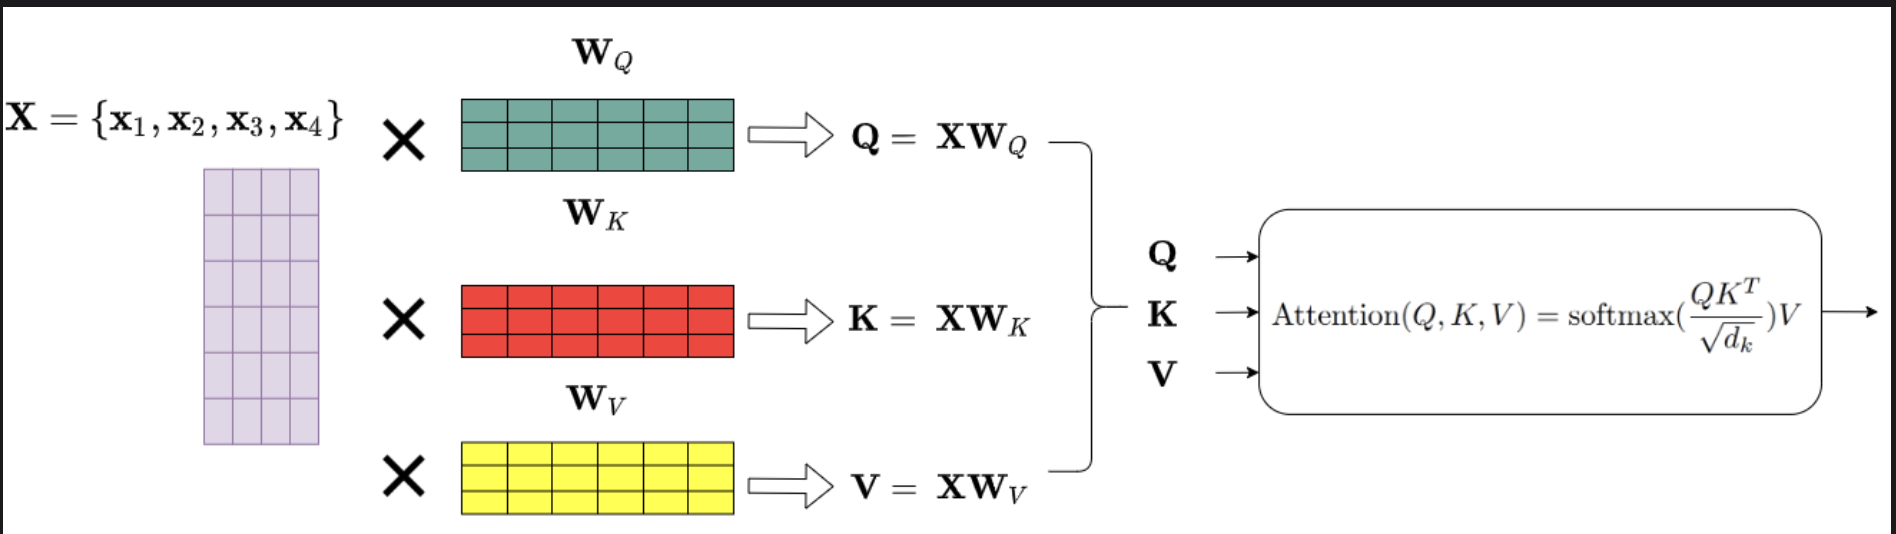

In [40]:
from typing import Optional, Tuple, Any

class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, 
                query: torch.FloatTensor, 
                key: torch.FloatTensor,
                value: torch.FloatTensor, 
                mask: Optional[torch.ByteTensor] = None, 
                dropout: Optional[nn.Dropout] = None
                ) -> Tuple[torch.Tensor, Any]:
        """
        Args:
            `query`: shape (batch_size, n_heads, max_len, d_q)
            `key`: shape (batch_size, n_heads, max_len, d_k)
            `value`: shape (batch_size, n_heads, max_len, d_v)
            `mask`: shape (batch_size, 1, 1, max_len)
            `dropout`: nn.Dropout
        Returns:
            `weighted value`: shape (batch_size, n_heads, max_len, d_v)
            `weight matrix`: shape (batch_size, n_heads, max_len, max_len)
        """
        
        d_k = query.size(-1)  # d_k = d_model / n_heads
        scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)  
        if mask is not None:
            scores = scores.masked_fill(mask.eq(0), -1e9)
        p_attn = F.softmax(scores, dim=-1) 
        if dropout is not None:
            p_attn = dropout(p_attn)
        return torch.matmul(p_attn, value), p_attn

# Multi-Head Self-Attention

Multi-head self-attention runs several self-attention operations in parallel, each with its own learnable projection of Queries, Keys, and Values.
Think of it as giving the model multiple sets of eyes — one head might pay attention to subject–verb links, another to nearby words, another to long-distance context.

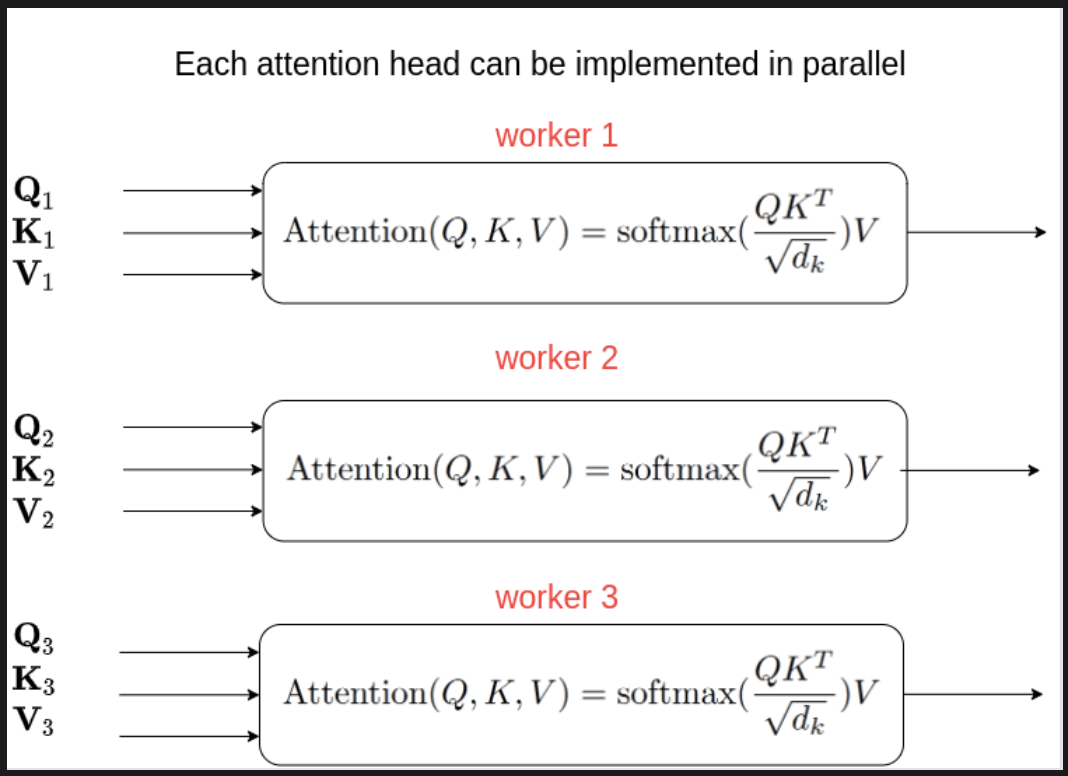

The key idea of Multi-Head Attention (MHA) is to repeat the entire K-V-Q attention process multiple times in parallel, and yes, this requires separate, independent trainable weight matrices for each head.

# 🎭 Multi-Head Attention: Capturing Diverse Relationships

## 💡 The Purpose of Multi-Head Attention

**Multi-Head Attention** is used to allow the model to capture **different aspects of relationships** simultaneously. Each "head" learns a different type of relationship or feature from the input sequence.

* **Example:** In the sentence *"The animal didn't cross the street because it was too wide."*
    * **Head 1** might learn that "it" refers to "**street**" (syntactic/structural relationship).
    * **Head 2** might learn that "**animal**" is the main subject (semantic relationship).

---

## 🛠️ The Connection: Separate Weights and Parallel Processing

If you define a self-attention layer with $H$ heads (e.g., $H=8$):

### 1. Separate Projection Matrices for Each Head

Instead of having just one set of projection matrices ($\mathbf{W}_Q, \mathbf{W}_K, \mathbf{W}_V$), the model initializes $H$ independent sets of matrices:

$$\text{Head}_h: \mathbf{W}_Q^{(h)}, \mathbf{W}_K^{(h)}, \mathbf{W}_V^{(h)}$$

This means that for an 8-head layer, the model will have $8 \times 3 = 24$ distinct, trainable weight matrices.

> The overall goal of the $\mathbf{W}$ matrices remains the same: to project the input embedding into specialized feature subspaces for Query, Key, and Value.

### 2. Parallel Projection & Independent Attention

The process flows simultaneously for all heads:

* **Parallel Projection:** The input tensor $\mathbf{X}$ is simultaneously multiplied by the matrices for all $H$ heads, creating $H$ sets of projected $\mathbf{Q}, \mathbf{K}$, and $\mathbf{V}$ tensors.
* **Independent Attention:** Each of the $H$ heads then independently performs the full attention calculation:
    $$\text{Head}_h = \text{Attention}(\mathbf{X} \mathbf{W}_Q^{(h)}, \mathbf{X} \mathbf{W}_K^{(h)}, \mathbf{X} \mathbf{W}_V^{(h)})$$

### 3. Concatenation and Final Projection

After each head calculates its own context vector output ($\mathbf{Z}^{(h)}$), the outputs are combined:

* **Concatenation:** The outputs from all $H$ heads are concatenated (stacked side-by-side):
    $$\mathbf{Z}_{\text{combined}} = \text{Concatenate}(\mathbf{Z}^{(1)}, \mathbf{Z}^{(2)}, \ldots, \mathbf{Z}^{(H)})$$
* **Final Linear Layer:** This large, combined vector is passed through one final, trainable linear layer ($\mathbf{W}_O$) to **blend the results** from the different heads and project the output back to the desired dimension.

> This process ensures that each head focuses on a distinct set of features before the final, comprehensive contextual vector is created.

# PyTorch implementation of multi-head attention

In Pytorch, we have something like the code shown below. Note that we use the ScaledDotProductAttention module that we showed in the previous lesson.

The basic three steps of the code are:

1. Compute the linear projections into keys, queries, and values.
2. Apply attention to all the projected vectors.
3. Concatenate them and apply a final linear.

In [41]:
class MultiHeadAttention(nn.Module):
    def __init__(self, n_heads: int, d_model: int, dropout: float = 0.1):
        super(MultiHeadAttention, self).__init__()
        assert d_model % n_heads == 0
        # We assume d_v always equals d_k
        self.d_k = d_model // n_heads
        self.h = n_heads

        self.linears = nn.ModuleList(
            [copy.deepcopy(nn.Linear(d_model, d_model)) for _ in range(4)]
        )
        self.sdpa = ScaledDotProductAttention()
        self.attn = None
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, query: torch.FloatTensor, 
                key: torch.FloatTensor, 
                value: torch.FloatTensor,
                mask: Optional[torch.ByteTensor] = None
                ) -> torch.FloatTensor:
        """
        Args:
            `query`: shape (batch_size, max_len, d_model)
            `key`: shape (batch_size, max_len, d_model)
            `value`: shape (batch_size, max_len, d_model)
            `mask`: shape (batch_size, max_len)

        Returns:
            shape (batch_size, max_len, d_model)
        """
        if mask is not None:
            # Same mask applied to all h heads. B*1*1*L
            mask = mask.unsqueeze(1).unsqueeze(1)
        
        batch_size = query.size(0)

        # 1) Do all the linear projections in batch from d_model => h x d_k
        query, key, value = [l(x).view(batch_size, -1, self.h, self.d_k).transpose(1, 2)
                             for l, x in zip(self.linears, (query, key, value))]

        # 2) Apply attention on all the projected vectors in batch.
        # x: B x H x L x D_v
        x, self.attn = self.sdpa(query, key, value, mask=mask, dropout=self.dropout)

        # 3) "Concat" using a view and apply a final linear.
        x = x.transpose(1, 2).contiguous().view(batch_size, -1, self.h * self.d_k)
        return self.linears[-1](x)

# Transformers Building Blocks

## Short residual skip connections

In a very rough manner, skip connections give a transformer a tiny ability to allow the representations of different levels of processing to interact. With the forming of multiple paths, we can “pass” our higher-level understanding of the last layers to the previous layers. This allows us to re-modulate how we understand the input. Again, this is the same idea as human top-down understanding, which is nothing more than expectations.

## Layer normalization

In Layer Normalization (LN), the mean and variance are computed across channels and spatial dims.

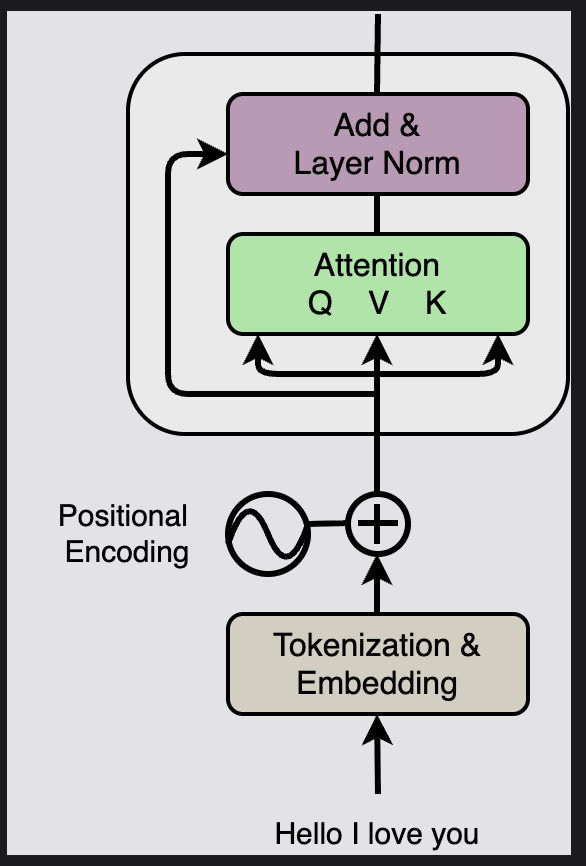

## Add linear layers to form the encoder

The idea of the linear layer after multi-head self-attention is to project the representation in a higher space and then back in the original space. This helps solve some stability issues and counter bad initializations.

In [42]:
import torch
import torch.nn as nn

dim = 512
dim_linear_block = 1024 ## usually a multiple of dim
dropout = 0.1

norm = nn.LayerNorm(dim)
linear = nn.Sequential(
            nn.Linear(dim, dim_linear_block),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(dim_linear_block, dim),
            nn.Dropout(dropout)
        )

# out = norm(linear(x) + x)

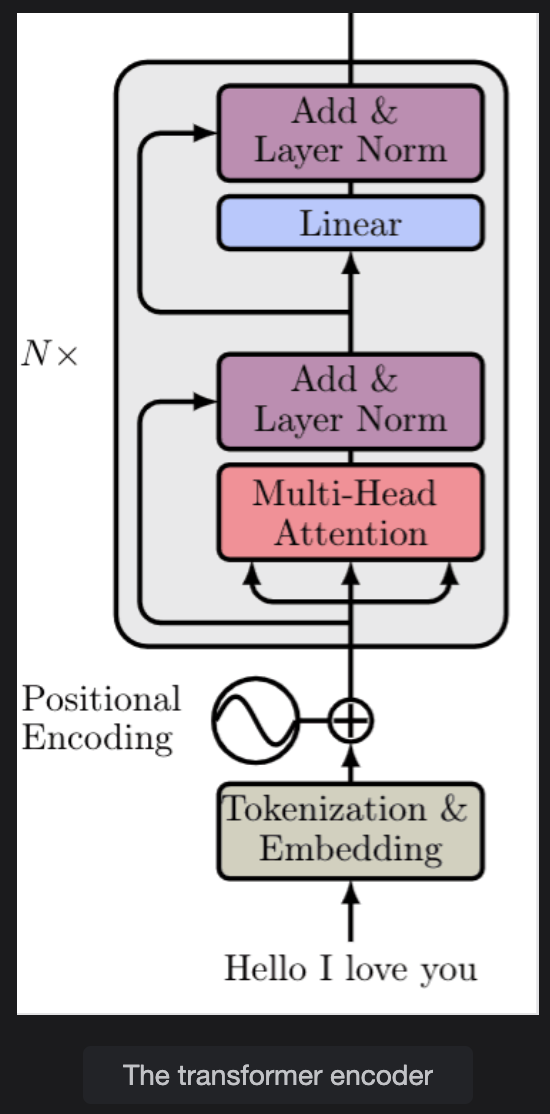

# Recap: The Transformer encoder

To process a sentence, we need to perform these three steps:

1. Word embeddings of the input sentence are computed simultaneously.

2. Positional encodings are then applied to each embedding resulting in word vectors that also include positional information.

3. The word vectors are passed to the first encoder block.

Each block consists of the following layers in the same order:

1. A multi-head self-attention layer to find correlations between each word

2. A normalization layer

3. A residual connection around the previous two sublayers

4. A linear layer

5. A second normalization layer

6. A second residual connection

In [43]:
class EncoderLayer(nn.Module):
    """Encoder is made up of self-attn and feed forward"""

    def __init__(self, size: int, self_attn: MultiHeadAttention, feed_forward: FeedForward, dropout: float):
        super(EncoderLayer, self).__init__()
        self.self_attn = self_attn
        self.feed_forward = feed_forward
        self.sublayer = nn.ModuleList([copy.deepcopy(SkipConnection(size, dropout)) for _ in range(2)])
        self.size = size

    def forward(self, x: torch.FloatTensor, mask: torch.ByteTensor) -> torch.FloatTensor:
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, mask))
        return self.sublayer[1](x, self.feed_forward)


class Encoder(nn.Module):
    """Core encoder is a stack of N layers"""

    def __init__(self, layer: EncoderLayer, N: int):
        super(Encoder, self).__init__()
        self.layers = nn.ModuleList([copy.deepcopy(layer) for _ in range(N)])
        self.norm = LayerNorm(layer.size)

    def forward(self, x: torch.FloatTensor, mask: torch.ByteTensor) -> torch.FloatTensor:
        """Pass the input (and mask) through each layer in turn."""
        for layer in self.layers:
            x = layer(x, mask)
        return self.norm(x)


class TransformerEncoder(nn.Module):
    """The encoder of transformer
    Args:
        `n_layers`: number of stacked encoder layers
        `d_model`: model dimension
        `d_ff`: hidden dimension of feed forward layer
        `n_heads`: number of heads of self-attention
        `dropout`: dropout rate, default 0.1
    """

    def __init__(self, d_model: int, d_ff: int, n_heads: int = 1, n_layers: int = 1,
                 dropout: float = 0.1):
        super(TransformerEncoder, self).__init__()
        self.multi_headed_attention = MultiHeadAttention(n_heads, d_model, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)
        self.encoder_layer = EncoderLayer(d_model, self.multi_headed_attention, self.feed_forward, dropout)
        self.encoder = Encoder(self.encoder_layer, n_layers)
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def forward(self, x: torch.FloatTensor, mask: torch.ByteTensor) -> torch.FloatTensor:
        return self.encoder(x, mask)

# The Transformer's Decoder

The decoder consists of all the aforementioned components plus two novel ones. As before:

1. The output sequence is fed in its entirety, and word embeddings are computed.

2. Positional encoding is again applied.

3. The vectors are passed to the first decoder block.

Each decoder block includes:

1. A masked multi-head self-attention layer

2. A normalization layer followed by a residual connection

3. A new multi-head attention layer (known as encoder-decoder attention)

4. A second normalization layer and a residual connection

5. A linear layer and a third residual connection

The decoder block appears again N=6 repeated times. The final output is transformed through a final linear layer, and the output probabilities are calculated with the standard softmax function

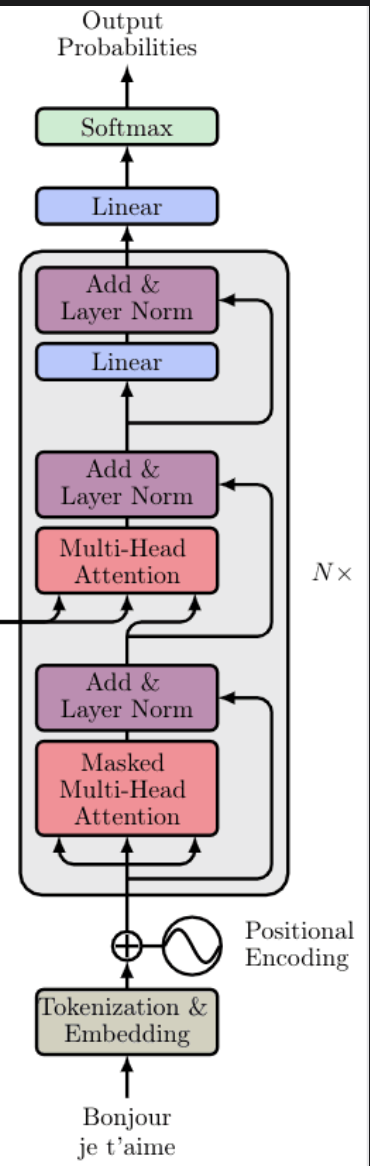

The output probabilities predict the next token in the output sentence.

How?

For the machine translation example, we assign a probability to each word in the French language, and then, we simply keep the one with the highest score.

To put things into perspective, the original model was trained on a 2014 English-French dataset consisting of 36 M sentences and 32,000 tokens.

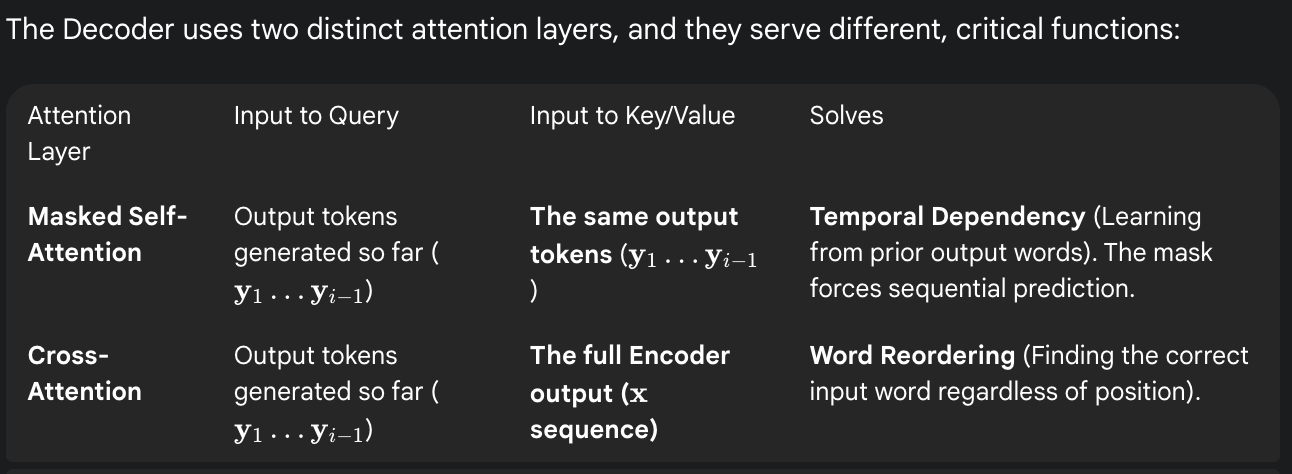

# 🧩 The Transformer Decoder: How It Processes and Reorders Language

The ability of the Decoder to handle word-order differences (like French vs. English) is **not** handled by the Masked Self-Attention layer. It is handled by the **Cross-Attention layer**.

## 1. The Roles of the Two Attention Layers

The Decoder uses two distinct attention layers, serving different, critical functions:

| Attention Layer | Input to Query | Input to Key/Value | Primary Function Solved |
| :--- | :--- | :--- | :--- |
| **Masked Self-Attention** | Output tokens generated so far ($\mathbf{y}_1 \ldots \mathbf{y}_{i-1}$) | The same output tokens ($\mathbf{y}_1 \ldots \mathbf{y}_{i-1}$) | **Temporal Dependency** (Learning from prior output words). The mask forces sequential prediction. |
| **Cross-Attention** | Output tokens generated so far ($\mathbf{y}_1 \ldots \mathbf{y}_{i-1}$) | The full **Encoder output** ($\mathbf{x}$ sequence) | **Word Reordering** (Finding the correct input word regardless of position). |

---

## 🤖 Summary: The Working of the Transformer Decoder

The Decoder's primary job is to generate the output sequence (e.g., the translation) one word at a time, using the full context of the source sentence and the words it has already generated.

### I. Initialization (Input Preparation)
The input to the Decoder is the target sequence (the previous output word plus all preceding words).

* **Training:** The input sequence is the **Ground Truth** target sentence (e.g., the correct French translation).
* **Inference (Usage):** The input sequence is the string of words the model has generated so far (starting with a `<SOS>` token).

### II. Step 1: Masked Self-Attention (Establishing Temporal Context)
This is the Decoder's **memory layer**.

* **Purpose:** To establish **temporal dependency**—ensuring the model predicts the current word based on the context of the words that came directly before it.
* **The Mask:** A **triangular mask** is applied to the $\mathbf{Q} \cdot \mathbf{K}^T$ scores. This forces the attention weights for all future tokens to zero.
* **The Result:** When predicting $\text{Word}_i$, attention is only paid to $\text{Word}_1$ through $\text{Word}_{i-1}$.

### III. Step 2: Cross-Attention (Reordering and Alignment)
This layer connects the Decoder's generated context to the Encoder's input sequence.

* **Inputs:**
    * **Query ($\mathbf{Q}$):** The output from the Masked Self-Attention layer.
    * **Keys ($\mathbf{K}$) & Values ($\mathbf{V}$):** The static output of the entire **Encoder** (the full, encoded source sentence).
* **Purpose:** To search the encoded input sentence for the most relevant information to generate the next word, **enabling word reordering**.
* **Alignment:** The Decoder's $\mathbf{Q}$ vector asks, *"Based on what I've written so far, which word in the source sentence is most relevant?"*
* **Retrieval:** The layer retrieves the $\mathbf{V}$ vector associated with that most relevant source word, regardless of its original position.

### IV. Step 3: Final Output (Prediction)
The output from the Cross-Attention layer passes through a final Feed-Forward Network and a linear layer, culminating in a Softmax layer that predicts the probability distribution over the entire vocabulary ($\hat{\mathbf{y}}_i$).

---

## 2. Training vs. Inference Paradigms

| Phase | Speed/Input | Sequential Constraint | Purpose of Mask |
| :--- | :--- | :--- | :--- |
| **Training** | **Fast (Parallel).** Uses Ground Truth as input. | The **Masked Self-Attention layer** enforces sequential dependency for learning the rules. | **Prevents the model from cheating** by seeing the correct answer during parallel computation. |
| **Inference** | **Slow (Sequential).** Uses model's own output as input. | The **loop itself** enforces sequential dependency, reading the last generated word before predicting the next. | **Ensures the model executes the rules** it learned by only using available (past) context. |

### 1. The Training Paradigm: Teacher Forcing 🧑‍🏫

During training, the model uses **Teacher Forcing** (providing the true next token) because it maximizes learning efficiency.

| Component | Training Action | Why it's Used |
| :--- | :--- | :--- |
| **Input to Decoder** | **Ground Truth sequence, shifted.** | Ensures the gradient is always based on the perfectly correct preceding context, allowing for faster learning. |
| **Masked Self-Attention** | Ensures that even when given the full ground truth sequence, the model only uses tokens up to $i-1$ to predict token $i$. | Teaches the model the necessary sequential dependency required for generation. |

### 2. The Inference Paradigm: Autonomous Generation 🤖

During inference, the model must operate autonomously, using its own previous predictions.

| Component | Inference Action | How It Works |
| :--- | :--- | :--- |
| **Sequential Loop** | The model runs in a slow, **sequential loop** (one word at a time). | It predicts $\text{Word}_1$, then predicts $\text{Word}_2$, and so on, until it outputs an `<EOS>` token. |
| **Input to Decoder** | The input to the Decoder is always the **previous word the model just generated** ($\hat{\mathbf{y}}_{i-1}$). | The model takes its own prediction, treats it as the new input, and feeds it into the Masked Self-Attention layer. |

### 3. Addressing Exposure Bias

* **Why This Works:** The Masked Self-Attention layer doesn't care where the preceding words came from. The model's internal weights have learned the dependency rules from the perfect ground truth data, and during inference, it executes these rules using the available context.
* **The Problem (Exposure Bias):** If the model makes a mistake early in the sequence (e.g., predicting "rug" instead of "mat"), that incorrect word is fed back as input for the next step. This is a sequence the model never saw during training, which can lead to accumulated error. Despite this risk, Teacher Forcing is used for efficient initial learning.

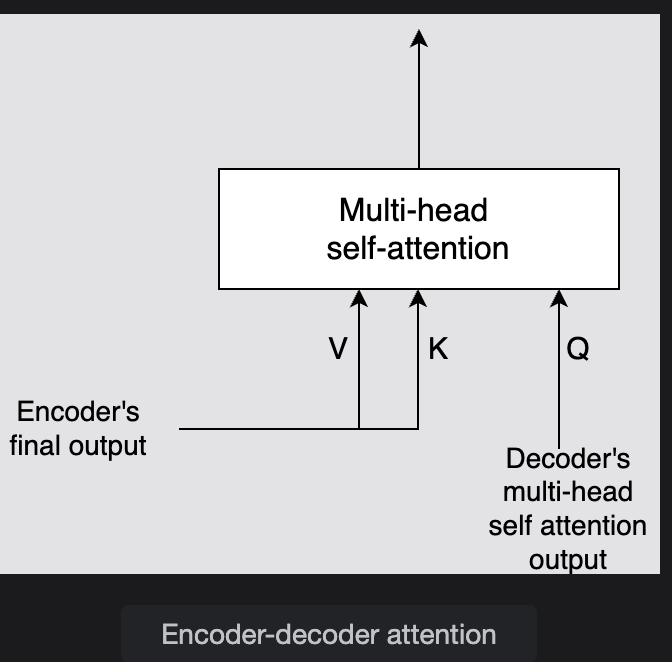

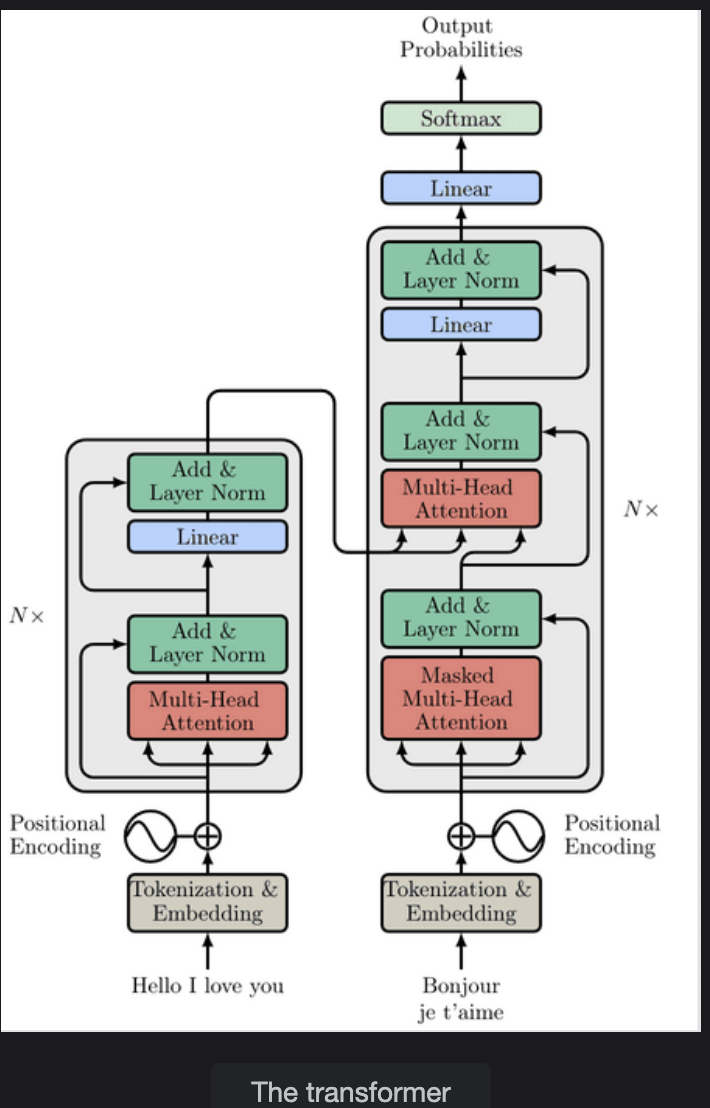

# Build a Transformer Encoder

## Linear layers

In [50]:
# A good first step is to build the linear subcomponent. A 2-layered feedforward network followed by dropout is good enough.
# So here is what the forward pass should look like:

# Linear Layer
# RELU as an activation function
# Dropout
# 2nd Linear layer

import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Optional, Tuple, Any, Union
import copy
import math

class FeedForward(nn.Module):
    def __init__(self, d_model: int, d_ff: int, dropout: float = 0.1):
        """
        Args:
            `d_model`: model dimension
            `d_ff`: hidden dimension of feed forward layer
            `dropout`: ropout rate, default 0.1
        """
        super(FeedForward, self).__init__() 
        ## 1. DEFINE 2 LINEAR LAYERS AND DROPOUT HERE
        self.FeedForward = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_ff, d_model)
        )
       
       

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
        Args:
            `x`: shape (batch_size, max_len, d_model)
        Returns:
            same shape as input x
        """
        ## 2.  RETURN THE FORWARD PASS 
        x = self.FeedForward(x)
        print(x)
        return x


# object = FeedForward(10, 100, 0.1)
# object.forward(torch.randn(5, 10))

# Layer normalization

class LayerNorm(nn.Module):
    def __init__(self, features: int, eps: float = 1e-6):
        # features = d_model
        super(LayerNorm, self).__init__()
        self.a = nn.Parameter(torch.ones(features))
        self.b = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.a * (x - mean) / (std + self.eps) + self.b
    
# Skip connection
    
class SkipConnection(nn.Module):
    """
    A residual connection followed by a layer norm.
    Note for code simplicity the norm is first as opposed to last.
    """

    def __init__(self, size: int, dropout: float):
        super(SkipConnection, self).__init__()
        self.norm = LayerNorm(size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, 
                x: torch.FloatTensor, 
                sublayer: Union[MultiHeadAttention, FeedForward]
                ) -> torch.FloatTensor:
        """Apply residual connection to any sublayer with the same size."""
        return x + self.dropout(sublayer(self.norm(x)))



class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, 
                query: torch.FloatTensor, 
                key: torch.FloatTensor,
                value: torch.FloatTensor, 
                mask: Optional[torch.ByteTensor] = None, 
                dropout: Optional[nn.Dropout] = None
                ) -> Tuple[torch.Tensor, Any]:
        """
        Args:
            `query`: shape (batch_size, n_heads, max_len, d_q)
            `key`: shape (batch_size, n_heads, max_len, d_k)
            `value`: shape (batch_size, n_heads, max_len, d_v)
            `mask`: shape (batch_size, 1, 1, max_len)
            `dropout`: nn.Dropout
        Returns:
            `weighted value`: shape (batch_size, n_heads, max_len, d_v)
            `weight matrix`: shape (batch_size, n_heads, max_len, max_len)
        """
        
        d_k = query.size(-1)  # d_k = d_model / n_heads
        scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)  
        if mask is not None:
            scores = scores.masked_fill(mask.eq(0), -1e9)
        p_attn = F.softmax(scores, dim=-1) 
        if dropout is not None:
            p_attn = dropout(p_attn)
        return torch.matmul(p_attn, value), p_attn
    

class MultiHeadAttention(nn.Module):
    def __init__(self, n_heads: int, d_model: int, dropout: float = 0.1):
        super(MultiHeadAttention, self).__init__()
        assert d_model % n_heads == 0
        # We assume d_v always equals d_k
        self.d_k = d_model // n_heads
        self.h = n_heads

        self.linears = nn.ModuleList(
            [copy.deepcopy(nn.Linear(d_model, d_model)) for _ in range(4)]
        )
        self.sdpa = ScaledDotProductAttention()
        self.attn = None
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, query: torch.FloatTensor, 
                key: torch.FloatTensor, 
                value: torch.FloatTensor,
                mask: Optional[torch.ByteTensor] = None
                ) -> torch.FloatTensor:
        """
        Args:
            `query`: shape (batch_size, max_len, d_model)
            `key`: shape (batch_size, max_len, d_model)
            `value`: shape (batch_size, max_len, d_model)
            `mask`: shape (batch_size, max_len)

        Returns:
            shape (batch_size, max_len, d_model)
        """
        if mask is not None:
            # Same mask applied to all h heads. B*1*1*L
            mask = mask.unsqueeze(1).unsqueeze(1)
        
        batch_size = query.size(0)

        # 1) Do all the linear projections in batch from d_model => h x d_k
        query, key, value = [l(x).view(batch_size, -1, self.h, self.d_k).transpose(1, 2)
                             for l, x in zip(self.linears, (query, key, value))]

        # 2) Apply attention on all the projected vectors in batch.
        # x: B x H x L x D_v
        x, self.attn = self.sdpa(query, key, value, mask=mask, dropout=self.dropout)

        # 3) "Concat" using a view and apply a final linear.
        x = x.transpose(1, 2).contiguous().view(batch_size, -1, self.h * self.d_k)
        return self.linears[-1](x)
    

class EncoderLayer(nn.Module):
    """Encoder  layer"""

    def __init__(self, size: int, self_attn: MultiHeadAttention, feed_forward: FeedForward, dropout: float):
        super(EncoderLayer, self).__init__()
        ## 3. EncoderLayer subcomponents
        self.self_attn = self_attn
        self.feed_forward = feed_forward
        self.sublayer = nn.ModuleList([copy.deepcopy(SkipConnection(size, dropout)) for _ in range(2)])
        self.size = size
       

    def forward(self, x: torch.FloatTensor, mask: torch.ByteTensor) -> torch.FloatTensor:
        ## 4. EncoderLayer forward pass
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, mask))
        return self.sublayer[1](x, self.feed_forward)

class Encoder(nn.Module):
    """Core encoder is a stack of N layers"""

    def __init__(self, layer: EncoderLayer, N: int):
        super(Encoder, self).__init__()
        ## 5. Encoder subcomponents
        self.layers = nn.ModuleList([copy.deepcopy(layer) for _ in range(N)])
        self.norm = LayerNorm(layer.size)


    def forward(self, x: torch.FloatTensor, mask: torch.ByteTensor) -> torch.FloatTensor:
        """Pass the input (and mask) through each layer in turn."""
        ## 6. Encoder forward pass
        for layer in self.layers:
            x = layer(x, mask)
        return self.norm(x)


class TransformerEncoder(nn.Module):
    """The encoder of transformer
    Args:
        `n_layers`: number of stacked encoder layers
        `d_model`: model dimension
        `d_ff`: hidden dimension of feed forward layer
        `n_heads`: number of heads of self-attention
        `dropout`: dropout rate, default 0.1
    """

    def __init__(self, d_model: int, d_ff: int, n_heads: int = 1, n_layers: int = 1,
                 dropout: float = 0.1):
        super(TransformerEncoder, self).__init__()
        self.multi_headed_attention = MultiHeadAttention(n_heads, d_model, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)
        self.encoder_layer = EncoderLayer(d_model, self.multi_headed_attention, self.feed_forward, dropout)
        self.encoder = Encoder(self.encoder_layer, n_layers)

    def forward(self, x: torch.FloatTensor, mask: torch.ByteTensor) -> torch.FloatTensor:
        return self.encoder(x, mask)


# construct a dummy input vector and a dummy mask and run a forward pass of your model.
dummy_input = torch.randn(2, 10, 512)  # (batch_size, max_len, d_model)
dummy_mask = torch.ones(2, 10).byte()  # (batch_size, max_len)
model = TransformerEncoder(d_model=512, d_ff=2048, n_heads=8, n_layers=6, dropout=0.1)
output = model(dummy_input, dummy_mask)
print(output.shape)  # should be (2, 10, 512)

tensor([[[ 0.3220,  0.0277,  0.0889,  ..., -0.0452, -0.3897, -0.3200],
         [-0.0142, -0.0345, -0.0180,  ..., -0.0832,  0.0308,  0.0597],
         [-0.1389,  0.0963, -0.2980,  ..., -0.0471,  0.1286, -0.1595],
         ...,
         [-0.0157, -0.1040,  0.0828,  ..., -0.2062, -0.1391, -0.0871],
         [ 0.2180,  0.2912, -0.2033,  ..., -0.1968,  0.2963, -0.0255],
         [-0.2415,  0.2511, -0.0254,  ..., -0.2395, -0.4278, -0.0496]],

        [[-0.2469, -0.2611,  0.2847,  ..., -0.4098,  0.1075,  0.0175],
         [ 0.2312, -0.0256, -0.7621,  ..., -0.0560,  0.0767, -0.0499],
         [-0.0664,  0.0030,  0.0585,  ..., -0.5949,  0.2951, -0.0230],
         ...,
         [ 0.1308,  0.1079, -0.1061,  ..., -0.3022,  0.1638, -0.0780],
         [ 0.1463,  0.2891,  0.1345,  ..., -0.4999, -0.1202, -0.1578],
         [-0.1605, -0.0780, -0.2120,  ..., -0.2248,  0.0793, -0.0839]]],
       grad_fn=<ViewBackward0>)
tensor([[[ 0.3501, -0.1340, -0.0256,  ..., -0.2739, -0.3020, -0.3670],
         [-0.